In [ ]:
#importar liberias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # manipulación y análisis de datos en estructuras como DataFrames.
import numpy as np # arreglos y funciones matemáticas avanzadas
import matplotlib.pyplot as plt # gráficos y visualizaciones de datos.
import seaborn as sns # visualizaciones estadísticas más estilizadas.

In [ ]:
comments = pd.read_csv('/content/drive/My Drive/Github/youtube/Youtube_project_shan_singh_Udemy (1)/UScomments.csv', encoding='utf-8', on_bad_lines='skip') # cargar el dataset, utf-8 para soportar caracteres especiales emojis, skipear errores en las lineas del dataset.

<ipython-input-4-1a0bea9d3b54>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('/content/drive/My Drive/Github/youtube/Youtube_project_shan_singh_Udemy (1)/UScomments.csv', encoding='utf-8', on_bad_lines='skip') # cargar el dataset, utf-8 para soportar caracteres especiales emojis, skipear errores en las lineas del dataset.


In [ ]:
#visualizar las 5 primeras filas de mis datos
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
# verfiicar si existen valores nulos
comments.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [ ]:
# dropear los valores nulos
comments.dropna(inplace=True)

Eliminar los valores nulos porque no representan ni un uno porciento del total de los datos


In [ ]:
#verificar si se eliminaron los valores nulos
comments.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


In [ ]:
comments.shape

(691374, 4)

In [ ]:
sample_df = comments[0:1000]

In [ ]:
sample_df.shape

(1000, 4)

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob # análisis de texto, incluyendo sentimiento, corrección y extracción de frases clave.

In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
TextBlob("Logan Paul it's yo big day").sentiment.polarity

0.0

In [ ]:
# Calcula la polaridad del sentimiento para cada comentario, asignando 0 en caso de error.

polarity = []

for comment in comments['comment_text']:
    try:
      polarity.append(TextBlob(comment).sentiment.polarity)
    except:
      polarity.append(0)

In [ ]:
# Devuelve la cantidad de elementos en la lista polarity, que debe coincidir con el número de comentarios analizados.
len(polarity)

691374

In [ ]:
#comments["polarity"]== 1

In [ ]:
# Agrega la lista polarity como una nueva columna en el DataFrame comments, asignando a cada comentario su puntaje de sentimiento.
comments["polarity"] = polarity

In [ ]:
# esto crea una variable filtro que guarda los sentimientos positivos
filter1 = comments["polarity"] == 1

In [ ]:
# Crea un nuevo DataFrame comments_positive que contiene solo los comentarios que cumplen con la condición filter1.
comments_positive = comments[filter1]

In [ ]:
# Crea un filtro filter2 que selecciona los comentarios con polaridad exactamente igual a -1 (sentimiento completamente negativo).
filter2 = comments["polarity"] == -1

In [ ]:
# Crea un nuevo DataFrame comments_negative que contiene solo los comentarios con polaridad -1 (sentimiento completamente negativo).
comments_negative = comments[filter2]

In [ ]:
# Muestra las primeras 5 filas del DataFrame comments_positive, que contiene los comentarios con sentimiento positivo según el filtro aplicado.
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [ ]:
!pip install wordcloud

In [ ]:
# Importa WordCloud para generar nubes de palabras y STOPWORDS para excluir palabras comunes sin significado relevante.
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Devuelve el conjunto de palabras vacías (stopwords) predefinidas en WordCloud, que se excluirán de la nube de palabras.
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
# Devuelve la columna "comment_text" del DataFrame comments, que contiene el texto de los comentarios.
comments["comment_text"]

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
...,...
691395,Лучшая
691396,qu'est ce que j'aimerais que tu viennes à Roan...
691397,Ven a mexico! 😍 te amo LP
691398,Islığı yeter...


In [ ]:
# Devuelve el tipo de datos de la columna "comment_text" en el DataFrame comments, que generalmente es un objeto pandas Series.
type(comments["comment_text"])

pandas.core.series.Series

In [ ]:
# Concatena todos los comentarios positivos en una sola cadena de texto, útil para análisis de texto como nubes de palabras.
total_comments_positive = "".join(comments_positive["comment_text"])

In [ ]:
# Crea una nube de palabras (WordCloud) a partir de los comentarios positivos, excluyendo palabras vacías (stopwords).
WordCloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

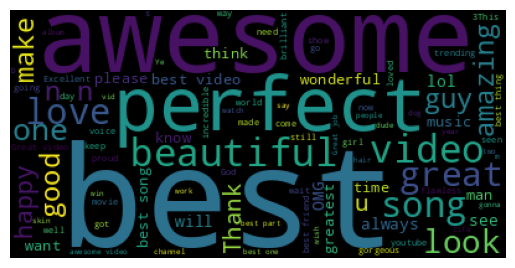

In [ ]:
# Muestra la nube de palabras generada para los comentarios positivos y oculta los ejes en la visualización.
plt.imshow(WordCloud_positive)
plt.axis("off")

In [ ]:
# Concatena todos los comentarios negativos en una sola cadena de texto, útil para generar una nube de palabras o análisis de texto.
total_comments_negative = "".join(comments_negative["comment_text"])

In [ ]:
# Crea una nube de palabras (WordCloud) a partir de los comentarios negativos, excluyendo palabras vacías (stopwords).
WordCloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

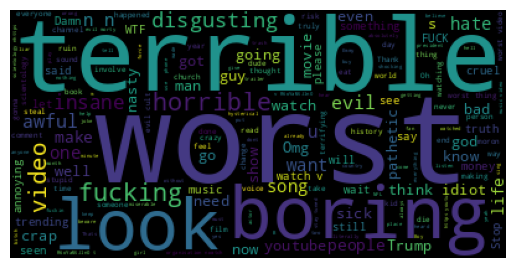

In [ ]:
# Muestra la nube de palabras generada para los comentarios negativos y oculta los ejes en la visualización.
plt.imshow(WordCloud_negative)
plt.axis("off")

In [ ]:
!pip install emoji==2.2.0


In [ ]:
# Importa la librería emoji, que permite trabajar con emojis en texto, como su conversión o detección.
import emoji

In [ ]:
emoji.__version__

'2.2.0'

In [ ]:
# Muestra las primeras 6 filas de la columna "comment_text" del DataFrame comments, que contiene los textos de los comentarios.
comments["comment_text"].head(6)

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
5,#1 on trending AYYEEEEE


In [ ]:
comment = "trending 😉" # Asigna el texto "trending 😉" a la variable comment.

In [ ]:
# Extrae y muestra solo los emojis presentes en la cadena de texto comment, verificando cada carácter con la base de datos de emojis de la librería emoji.
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [ ]:
# Crea una lista emoji_list que almacena los emojis encontrados en la cadena de texto comment, verificando cada carácter con la base de datos de emojis de la librería emoji.
emoji_list = []
for char in comment:
  if char in emoji.EMOJI_DATA:
    emoji_list.append(char)

In [ ]:
emoji_list

['😉']

In [ ]:
# Crea una lista all_emoji_list que almacena todos los emojis encontrados en la columna "comment_text" del DataFrame comments, ignorando valores nulos.
all_emoji_list = []
for comment in comments["comment_text"].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

In [ ]:
# Muestra los primeros 10 emojis extraídos de los comentarios en la lista all_emoji_list.
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [ ]:
# Importa Counter de la librería collections, que permite contar la frecuencia de elementos en una lista o colección de datos.
from collections import Counter

In [ ]:
# Cuenta la frecuencia de cada emoji en la lista all_emoji_list y muestra los 10 más comunes.
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [ ]:
# Obtiene el emoji más común y su frecuencia de aparición en la lista all_emoji_list.
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [ ]:
# Extrae solo la frecuencia de aparición del emoji más común en la lista all_emoji_list.
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [ ]:
# Crea una lista emojis con los 10 emojis más comunes en all_emoji_list, extrayendo solo los caracteres de los emojis.
emojis = [Counter(all_emoji_list).most_common(10)[i][0]  for i in range(10)]

In [ ]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [ ]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1]  for i in range(10)]

In [ ]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [ ]:
# Importa objetos gráficos de Plotly para crear visualizaciones interactivas y habilita la visualización en Jupyter Notebook con iplot.
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# Crea un gráfico de barras con Plotly donde el eje X contiene los emojis más comunes y el eje Y sus respectivas frecuencias.
trace = go.Bar(x=emojis, y=freqs)

In [ ]:
# Genera y muestra el gráfico interactivo de barras con los emojis más comunes y sus frecuencias usando Plotly.
iplot([trace])

In [ ]:
import os

# Ruta de la carpeta de Google Drive que quieres explorar
drive_folder = '/content/drive/My Drive/Github/youtube/Youtube_project_shan_singh_Udemy (1)/additional_data'


# Listar archivos en la carpeta seleccionada
files = os.listdir(drive_folder)

# Filtrar solo archivos CSV
files_csv = [file for file in files if file.endswith(".csv")]

print("Archivos CSV encontrados en Drive:", files_csv)



Archivos CSV encontrados en Drive: ['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'INvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'MXvideos.csv', 'RUvideos.csv', 'USvideos.csv']


In [ ]:
import pandas as pd

# Crear DataFrame vacío
full_df = pd.DataFrame()

# Ruta de la carpeta de Google Drive
drive_folder = '/content/drive/My Drive/Github/youtube/Youtube_project_shan_singh_Udemy (1)/additional_data/'

# Leer y combinar todos los archivos CSV
for file in files_csv:
    file_path = f"{drive_folder}{file}"  # Construye la ruta completa del archivo en Drive
    current_df = pd.read_csv(file_path, encoding="iso-8859-1", on_bad_lines="skip")  # Leer CSV
    full_df = pd.concat([full_df, current_df], ignore_index=True)  # Concatenar



In [ ]:
full_df.shape

(375942, 16)

In [ ]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [ ]:
full_df = full_df.drop_duplicates()

In [ ]:
full_df.shape

(339525, 16)

In [ ]:
ruta = "/content/drive/My Drive/Github/youtube/full_df.csv"
full_df[0:1000].to_csv(ruta, index=False, encoding='utf-8')
print(f"Archivo guardado en: {ruta}")


Archivo guardado en: /content/drive/My Drive/Github/youtube/full_df.csv


In [ ]:
!pip install openpyxl

In [ ]:
ruta = "/content/drive/My Drive/Github/youtube/full_df.xlsx"

# Guarda el DataFrame como archivo Excel
full_df[0:1000].to_excel(ruta, index=False, engine='openpyxl')
print(f"Archivo guardado en: {ruta}")


Archivo guardado en: /content/drive/My Drive/Github/youtube/full_df.xlsx


In [ ]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
json_df = pd.read_json('/content/drive/My Drive/Github/youtube/Youtube_project_shan_singh_Udemy (1)/additional_data/US_category_id.json')

In [ ]:
ruta = "/content/drive/My Drive/Github/youtube/full_df.xlsx"

# Guarda el DataFrame como archivo Excel
full_df[0:1000].to_excel(ruta, index=False, engine='openpyxl')
print(f"Archivo guardado en: {ruta}")


Archivo guardado en: /content/drive/My Drive/Github/youtube/full_df.xlsx


In [ ]:
ruta = "/content/drive/My Drive/Github/youtube/full_df.xlsx"

# Guarda el DataFrame como archivo Excel
full_df[0:1000].to_excel(ruta, index=False, engine='openpyxl')
print(f"Archivo guardado en: {ruta}")


Archivo guardado en: /content/drive/My Drive/Github/youtube/full_df.xlsx


In [ ]:
ruta = "/content/drive/My Drive/Github/youtube/full_df.xlsx"

# Guarda el DataFrame como archivo Excel
full_df[0:1000].to_excel(ruta, index=False, engine='openpyxl')
print(f"Archivo guardado en: {ruta}")


Archivo guardado en: /content/drive/My Drive/Github/youtube/full_df.xlsx


In [ ]:
json_df["items"]

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
json_df["items"][0]


{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
cat_dict = {}
for item in json_df["items"].values:
  cat_dict[int(item["id"])] = item["snippet"]["title"]

In [ ]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
full_df.shape

(339525, 16)

In [ ]:
full_df["category_id"] = full_df["category_id"].astype("Int64")

In [ ]:
full_df["category_name"] = full_df["category_id"].map(cat_dict)

In [ ]:
full_df["category_name"]

,category_name
0,Music
1,Comedy
2,Comedy
3,Entertainment
4,Music
...,...
375936,People & Blogs
375938,People & Blogs
375939,Entertainment
375940,Film & Animation


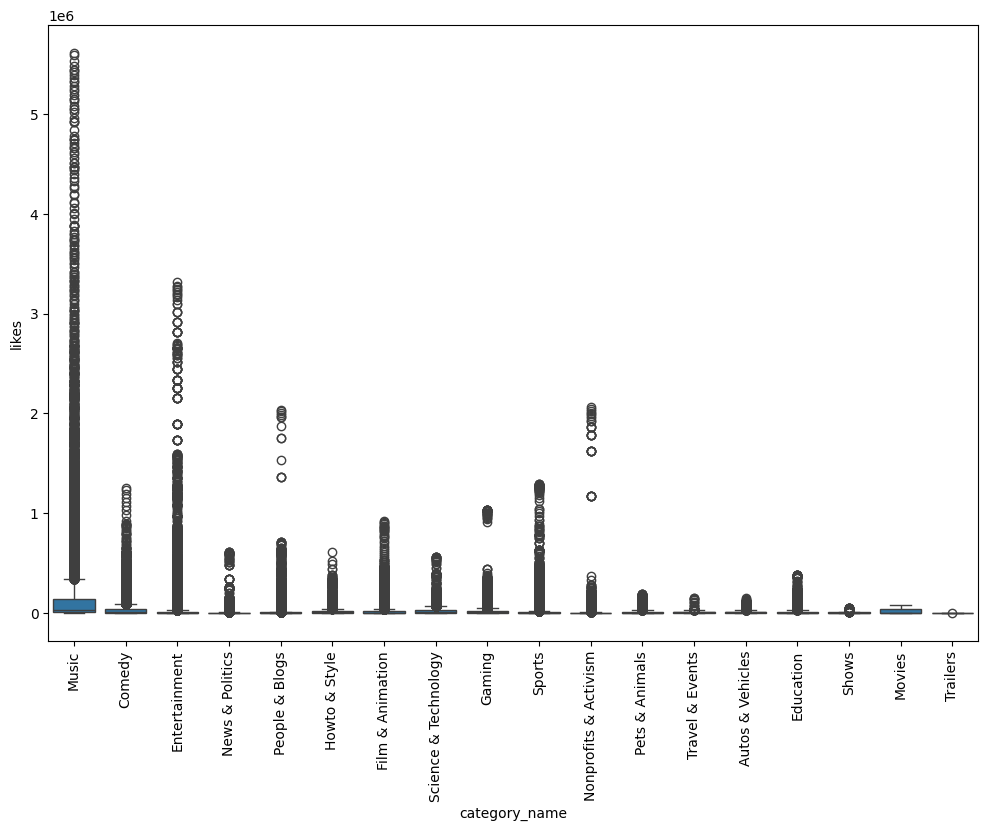

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x ="category_name" , y = "likes", data = full_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
full_df["like_rate"]=(full_df["likes"]/full_df["views"])*100
full_df["dislike_rate"]=(full_df["dislikes"]/full_df["views"])*100
full_df["comment_count"]= (full_df["comment_count"]/full_df["views"])*100

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate'],
      dtype='object')

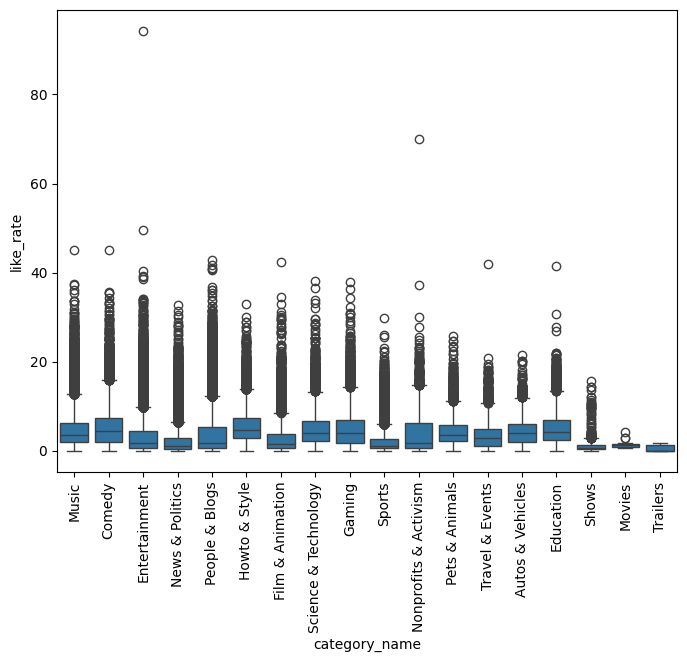

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x ="category_name" , y = "like_rate", data = full_df)
plt.xticks(rotation = "vertical")
plt.show()

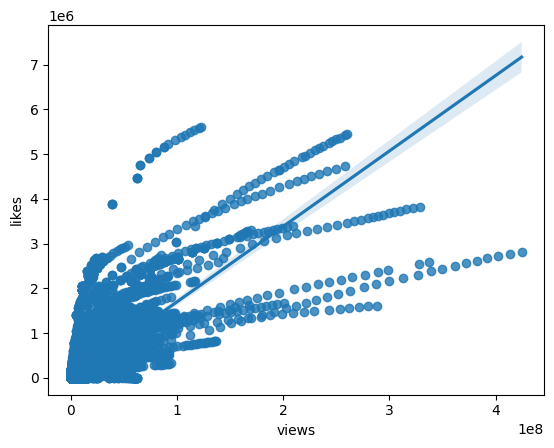

In [ ]:
sns.regplot(x = "views", y = "likes", data = full_df)
plt.show()

In [ ]:
full_df[["views", "likes" ,"dislikes"]].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


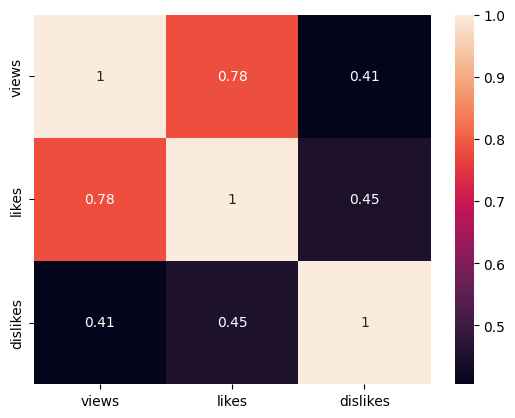

In [ ]:
sns.heatmap(full_df[["views", "likes" ,"dislikes"]].corr(), annot = True)
plt.show()

In [ ]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,0.733639,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,1.284185,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,0.256342,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292


In [ ]:
full_df["channel_title"].value_counts()

,count
channel_title,
The Late Show with Stephen Colbert,710
WWE,643
Late Night with Seth Meyers,592
TheEllenShow,555
Jimmy Kimmel Live,528
...,...
The Secrets of Dairy,1
babygranderecords,1
24 Oras News Today,1


In [ ]:
cdf = full_df.groupby(["channel_title"]).size().sort_values(ascending= False).reset_index()

In [ ]:
cdf = cdf.rename(columns={0:"total_videos"})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [ ]:
import plotly.express as px

In [ ]:
px.bar(cdf[0:20], x = "channel_title", y = "total_videos")

In [ ]:
full_df["title"][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
len([char for char in full_df["title"][0] if char in string.punctuation])

4

In [ ]:
def punctuation_counter(text):
  return len([char for char in text if char in string.punctuation])

In [ ]:
sample = full_df[0:100000]

In [ ]:
sample["count_punc"]= sample["title"].apply(punctuation_counter)

<ipython-input-118-b03a2292f423>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
sample["count_punc"]

,count_punc
0,4
1,1
2,3
3,3
4,3
...,...
106522,2
106523,3
106524,5
106525,2


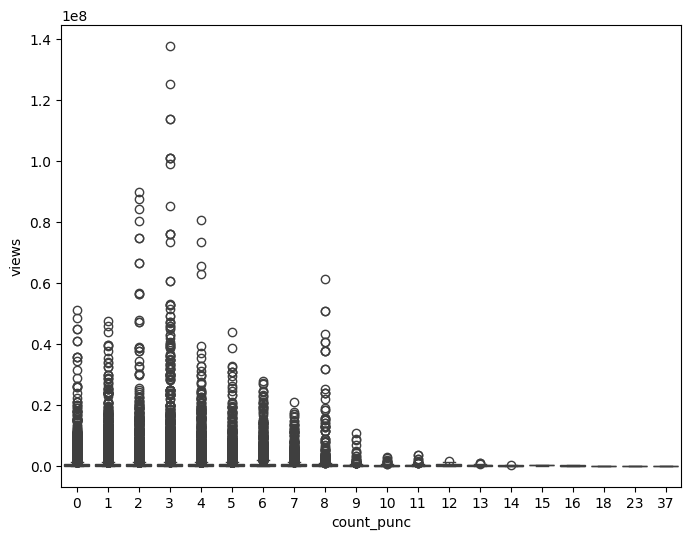

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "count_punc", y = "views", data = sample)
plt.show()